### Business Problem Satement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

In [1]:
# lets import the required libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Public\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading data from csv
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
# lets check the dimensions of the dataset
telecom_df.shape

(99999, 226)

In [4]:
# feature type summary
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# look at data statistics
telecom_df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [6]:
# create df backup
original_telecom_df = telecom_df.copy()

In [7]:

# create column name list by types of columns
telecom_id_cols = ['mobile_number', 'circle_id']

telecom_date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

telecom_cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

telecom_num_cols = [column for column in telecom_df.columns if column not in telecom_id_cols + telecom_date_cols + telecom_cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(telecom_id_cols), len(telecom_date_cols), len(telecom_num_cols), len(telecom_cat_cols)))

# check if we have missed any column or not
print(len(telecom_id_cols) + len(telecom_date_cols) + len(telecom_num_cols) + len(telecom_cat_cols) == telecom_df.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### Let's explore the data to see if there are any missing values.

In [8]:
# look at missing value ratio in each column
telecom_df.isnull().sum()*100/telecom_df.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### Impute missing values

In [9]:
# some columns have minimum value of 1 while some don't
recharge_telecom_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

telecom_df[recharge_telecom_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [10]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
telecom_df.loc[telecom_df.total_rech_data_6.isnull() & telecom_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


#### In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbere that month.

In [11]:
# create a list of recharge columns where we will impute missing values with zeroes
telecom_zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
# impute missing values with 0
telecom_df[telecom_zero_impute] = telecom_df[telecom_zero_impute].apply(lambda x: x.fillna(0))

# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom_df[telecom_zero_impute].isnull().sum()*100/telecom_df.shape[1])

telecom_df[telecom_zero_impute].describe()

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


#### Now we will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [12]:
# replace missing values with '-1' in categorical columns
telecom_df[telecom_cat_cols] = telecom_df[telecom_cat_cols].apply(lambda x: x.fillna(-1))
# missing value ratio
print("Missing value ratio:\n")
print(telecom_df[telecom_cat_cols].isnull().sum()*100/telecom_df.shape[0])

telecom_df.shape

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


(99999, 226)

In [13]:
# dropping date and id columns
telecom_df = telecom_df.drop(telecom_id_cols + telecom_date_cols, axis=1)
telecom_df.shape

(99999, 212)

In [14]:
#Drop variables with more than a given threshold of missing values
initial_cols = telecom_df.shape[1]

MISSING_THRESHOLD = 0.7

telecom_include_cols = list(telecom_df.apply(lambda column: True if column.isnull().sum()/telecom_df.shape[0] < MISSING_THRESHOLD else False))

drop_telecom_missing = pd.DataFrame({'features':telecom_df.columns , 'include': telecom_include_cols})
drop_telecom_missing.loc[drop_telecom_missing.include == True,:]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [15]:
# drop columns
telecom_df = telecom_df.loc[:, telecom_include_cols]

dropped_telecom_cols = telecom_df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_telecom_cols))
telecom_df.shape

-16 columns dropped.


(99999, 196)

In [16]:
#imputation using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputed_df= pd.DataFrame(IterativeImputer(max_iter=5, random_state=0, verbose=2).fit_transform(telecom_df), columns=telecom_df.columns)
imputed_df.head()

[IterativeImputer] Completing matrix with shape (99999, 196)
[IterativeImputer] Ending imputation round 1/5, elapsed time 534.90
[IterativeImputer] Ending imputation round 2/5, elapsed time 1117.31
[IterativeImputer] Ending imputation round 3/5, elapsed time 1681.96
[IterativeImputer] Ending imputation round 4/5, elapsed time 2295.00
[IterativeImputer] Ending imputation round 5/5, elapsed time 2879.94


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,131.918862,129.843311,0.00,132.153818,198.884103,197.257571,0.00,189.47953,16.634464,-9.762342,0.00,16.553201,24.577522,21.030534,0.00,12.428601,47.101019,46.474173,0.00,44.58575,93.342572,91.397164,0.00,90.462937,3.743806,3.814891,0.00,3.613457,13.865933,12.415975,0.00,1.770408,144.176517,141.693776,0.00,138.649019,79.83049,83.300407,0.00,82.34799,87.29997,90.804077,0.00,86.274314,1.121982,1.127458,0.00,1.023711,0.0,0.0,0.0,0.0,168.238044,175.214034,0.00,169.624821,0.799413,0.77711,0.0,0.724747,3.913269,4.964214,0.00,4.405847,-317.016407,-322.56199,0.0,-313.326479,0.00,0.00,0.00,0.00,47.923991,47.994176,0.16,46.277449,107.474236,107.115628,4.13,106.16022,12.288761,13.562038,1.15,11.556281,167.662627,168.648872,5.44,163.964614,9.578484,10.009479,0.00,9.437121,20.721737,21.659487,0.00,19.61839,2.348609,2.611853,0.00,1.960301,0.0,0.0,0.0,0.0,32.619755,34.24164,0.00,30.975309,0.00,0.00,5.44,0.00,-0.51503,0.008593,0.0,-0.001952,7.459233,8.335272,0.0,8.06208,-207.092837,-211.119593,0.0,-202.829091,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,2

In [17]:
# convert imputed numpy array to pandas dataframe
imputed_df = pd.DataFrame(imputed_df, columns=telecom_df.columns)
print(imputed_df.isnull().sum()*100/imputed_df.shape[0])

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

### Filter High Value Customers

In [18]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
imputed_df['total_data_rech_6'] = imputed_df.total_rech_data_6 * imputed_df.av_rech_amt_data_6
imputed_df['total_data_rech_7'] = imputed_df.total_rech_data_7 * imputed_df.av_rech_amt_data_7
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
imputed_df['amt_data_6'] = imputed_df.total_rech_amt_6 + imputed_df.total_data_rech_6
imputed_df['amt_data_7'] = imputed_df.total_rech_amt_7 + imputed_df.total_data_rech_7
# calculate average recharge done by customer in June and July
imputed_df['av_amt_data_6_7'] = (imputed_df.amt_data_6 + imputed_df.amt_data_7)/2
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(imputed_df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [19]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom_df_filtered = imputed_df.loc[imputed_df.av_amt_data_6_7 >= imputed_df.av_amt_data_6_7.quantile(0.7), :]
telecom_df_filtered = telecom_df_filtered.reset_index(drop=True)
telecom_df_filtered.shape

(30001, 201)

In [20]:
# delete variables created to filter high-value customers
telecom_df_filtered = telecom_df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
telecom_df_filtered.shape

(30001, 196)

### derive churn

In [21]:
# calculate total incoming and outgoing minutes of usage
telecom_df_filtered['total_calls_mou_9'] = telecom_df_filtered.total_ic_mou_9 + telecom_df_filtered.total_og_mou_9
# calculate 2g and 3g data consumption
telecom_df_filtered['total_internet_mb_9'] =  telecom_df_filtered.vol_2g_mb_9 + telecom_df_filtered.vol_3g_mb_9

# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn
telecom_df_filtered['churn'] = telecom_df_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)
# delete derived variables
telecom_df_filtered = telecom_df_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)
# change data type to category
telecom_df_filtered.churn = telecom_df_filtered.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(telecom_df_filtered.churn.value_counts()*100/telecom_df_filtered.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


### Calculate difference between 8th and previous months
Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [22]:
telecom_df_filtered['arpu_diff'] = telecom_df_filtered.arpu_8 - ((telecom_df_filtered.arpu_6 + telecom_df_filtered.arpu_7)/2)

telecom_df_filtered['onnet_mou_diff'] = telecom_df_filtered.onnet_mou_8 - ((telecom_df_filtered.onnet_mou_6 + telecom_df_filtered.onnet_mou_7)/2)

telecom_df_filtered['offnet_mou_diff'] = telecom_df_filtered.offnet_mou_8 - ((telecom_df_filtered.offnet_mou_6 + telecom_df_filtered.offnet_mou_7)/2)

telecom_df_filtered['roam_ic_mou_diff'] = telecom_df_filtered.roam_ic_mou_8 - ((telecom_df_filtered.roam_ic_mou_6 + telecom_df_filtered.roam_ic_mou_7)/2)

telecom_df_filtered['roam_og_mou_diff'] = telecom_df_filtered.roam_og_mou_8 - ((telecom_df_filtered.roam_og_mou_6 + telecom_df_filtered.roam_og_mou_7)/2)

telecom_df_filtered['loc_og_mou_diff'] = telecom_df_filtered.loc_og_mou_8 - ((telecom_df_filtered.loc_og_mou_6 + telecom_df_filtered.loc_og_mou_7)/2)

telecom_df_filtered['std_og_mou_diff'] = telecom_df_filtered.std_og_mou_8 - ((telecom_df_filtered.std_og_mou_6 + telecom_df_filtered.std_og_mou_7)/2)

telecom_df_filtered['isd_og_mou_diff'] = telecom_df_filtered.isd_og_mou_8 - ((telecom_df_filtered.isd_og_mou_6 + telecom_df_filtered.isd_og_mou_7)/2)

telecom_df_filtered['spl_og_mou_diff'] = telecom_df_filtered.spl_og_mou_8 - ((telecom_df_filtered.spl_og_mou_6 + telecom_df_filtered.spl_og_mou_7)/2)

telecom_df_filtered['total_og_mou_diff'] = telecom_df_filtered.total_og_mou_8 - ((telecom_df_filtered.total_og_mou_6 + telecom_df_filtered.total_og_mou_7)/2)

telecom_df_filtered['loc_ic_mou_diff'] = telecom_df_filtered.loc_ic_mou_8 - ((telecom_df_filtered.loc_ic_mou_6 + telecom_df_filtered.loc_ic_mou_7)/2)

telecom_df_filtered['std_ic_mou_diff'] = telecom_df_filtered.std_ic_mou_8 - ((telecom_df_filtered.std_ic_mou_6 + telecom_df_filtered.std_ic_mou_7)/2)

telecom_df_filtered['isd_ic_mou_diff'] = telecom_df_filtered.isd_ic_mou_8 - ((telecom_df_filtered.isd_ic_mou_6 + telecom_df_filtered.isd_ic_mou_7)/2)

telecom_df_filtered['spl_ic_mou_diff'] = telecom_df_filtered.spl_ic_mou_8 - ((telecom_df_filtered.spl_ic_mou_6 + telecom_df_filtered.spl_ic_mou_7)/2)

telecom_df_filtered['total_ic_mou_diff'] = telecom_df_filtered.total_ic_mou_8 - ((telecom_df_filtered.total_ic_mou_6 + telecom_df_filtered.total_ic_mou_7)/2)

telecom_df_filtered['total_rech_num_diff'] = telecom_df_filtered.total_rech_num_8 - ((telecom_df_filtered.total_rech_num_6 + telecom_df_filtered.total_rech_num_7)/2)

telecom_df_filtered['total_rech_amt_diff'] = telecom_df_filtered.total_rech_amt_8 - ((telecom_df_filtered.total_rech_amt_6 + telecom_df_filtered.total_rech_amt_7)/2)

telecom_df_filtered['max_rech_amt_diff'] = telecom_df_filtered.max_rech_amt_8 - ((telecom_df_filtered.max_rech_amt_6 + telecom_df_filtered.max_rech_amt_7)/2)

telecom_df_filtered['total_rech_data_diff'] = telecom_df_filtered.total_rech_data_8 - ((telecom_df_filtered.total_rech_data_6 + telecom_df_filtered.total_rech_data_7)/2)

telecom_df_filtered['max_rech_data_diff'] = telecom_df_filtered.max_rech_data_8 - ((telecom_df_filtered.max_rech_data_6 + telecom_df_filtered.max_rech_data_7)/2)

telecom_df_filtered['av_rech_amt_data_diff'] = telecom_df_filtered.av_rech_amt_data_8 - ((telecom_df_filtered.av_rech_amt_data_6 + telecom_df_filtered.av_rech_amt_data_7)/2)

telecom_df_filtered['vol_2g_mb_diff'] = telecom_df_filtered.vol_2g_mb_8 - ((telecom_df_filtered.vol_2g_mb_6 + telecom_df_filtered.vol_2g_mb_7)/2)

telecom_df_filtered['vol_3g_mb_diff'] = telecom_df_filtered.vol_3g_mb_8 - ((telecom_df_filtered.vol_3g_mb_6 + telecom_df_filtered.vol_3g_mb_7)/2)

# let's look at summary of one of the difference variables
telecom_df_filtered['total_og_mou_diff'].describe()

count    30001.000000
mean       -67.437337
std        502.630069
min      -7213.410000
25%       -168.025000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [23]:
# Let's delete all variables relating to 9th month
telecom_df_filtered = telecom_df_filtered.filter(regex='[^9]$', axis=1)
telecom_df_filtered.shape

(30001, 173)

In [24]:
# extract all names that end with 9
col_9_names = imputed_df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cate_cols = [col for col in telecom_cat_cols if col not in col_9_names]
cate_cols.append('churn')
num_cols = [col for col in telecom_df_filtered.columns if col not in cate_cols]

In [25]:
telecom_df_filtered.head(173)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_mou_diff,std_og_mou_diff,isd_og_mou_diff,spl_og_mou_diff,total_og_mou_diff,loc_ic_mou_diff,std_ic_mou_diff,isd_ic_mou_diff,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
0,0.0,0.0,0.0,197.385,214.816,213.803,131.918862,129.843311,0.000000,198.884103,197.257571,0.000000,16.634464,-9.762342,0.000000,24.577522,21.030534,0.000000,47.101019,46.474173,0.000000,93.342572,91.397164,0.000000,3.743806,3.814891,0.000000,13.865933,12.415975,0.000000,144.176517,141.693776,0.000000,79.830490,83.300407,0.000000,87.299970,90.804077,0.000000,1.121982,1.127458,0.000000,0.0,0.0,0.0,168.238044,175.214034,0.000000,0.799413,0.777110,0.000000,3.913269,4.964214,0.000000,-317.016407,-322.561990,0.000000,0.00,0.00,0.00,47.923991,47.994176,0.160000,107.474236,107.115628,4.130000,12.288761,13.562038,1.150000,167.662627,168.648872,5.440000,9.578484,10.009479,0.000000,20.721737,21.659487,0.000000,2.348609,2.611853,0.000000,0.0,0.0,0.0,32.619755,34.241640,0.000000,0.00,0.00,5.44,-0.515030,0.008593,0.000000,7.459233,8.335272,0.000000,-207.092837,-211.119593,0.000000,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.00,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,3.58,1,7.7025,-130.881087,-198.070837,-3.436061,-22.804028,-142.935146,-171.726039,-0.788262,-4.438741,0.000,-162.715750,-33.430698,-7.897252,0.253219,5.440,-1.5,-55.0,0.0,0.0,0.0,0.00,-9.975,-7.555
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.290000,453.430000,567.160000,325.91

## EDA

In [26]:
# change columns types
telecom_df_filtered[num_cols] = telecom_df_filtered[num_cols].apply(pd.to_numeric)
telecom_df_filtered[cate_cols] = telecom_df_filtered[cate_cols].apply(lambda column: column.astype("category"), axis=0)

In [27]:

# create plotting functions
def detect_data_type(var):
    if var.dtype == np.int64 or var.dtype == np.float64:
        return 'numerical'
    elif var.dtype == 'category':
        return 'categorical'
    
def univariate_plot(var, stats=True):
    
    if detect_data_type(var) == 'numerical':
        sns.distplot(var)
        if stats == True:
            print(var.describe())
    
    elif detect_data_type(var) == 'categorical':
        sns.countplot(var)
        if stats == True:
            print(var.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate_plot(var1, var2):
    if detect_data_type(var1) == 'numerical' and detect_data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (detect_data_type(var1) == 'categorical' and detect_data_type(var2) == 'numerical') or (detect_data_type(var1) == 'numerical' and detect_data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

## Univariate EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


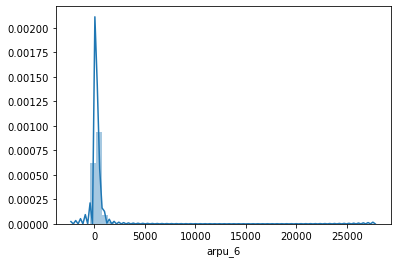

In [28]:
 univariate_plot(imputed_df.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


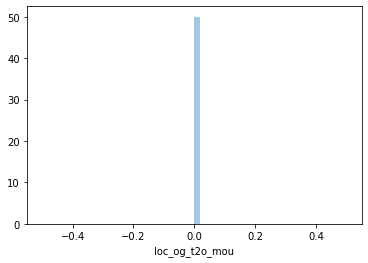

In [29]:
univariate_plot(imputed_df.loc_og_t2o_mou)

count    99999.000000
mean       133.812104
std        300.548299
min          0.000000
25%          7.410000
50%         37.160000
75%        146.380000
max      10752.560000
Name: onnet_mou_8, dtype: float64


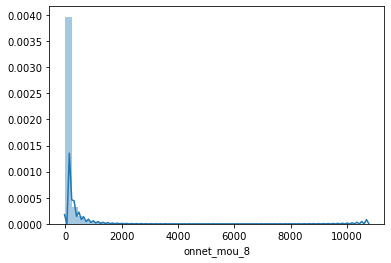

In [30]:
univariate_plot(imputed_df.onnet_mou_8)

## Bivariate EDA

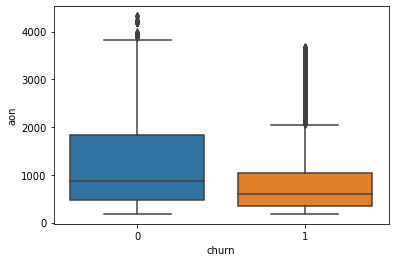

In [31]:
bivariate_plot(telecom_df_filtered.churn, telecom_df_filtered.aon)

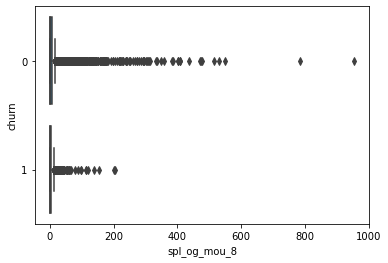

In [32]:
bivariate_plot(telecom_df_filtered.spl_og_mou_8, telecom_df_filtered.churn)

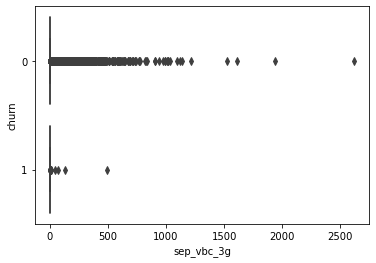

In [33]:
bivariate_plot(telecom_df_filtered.sep_vbc_3g, telecom_df_filtered.churn)

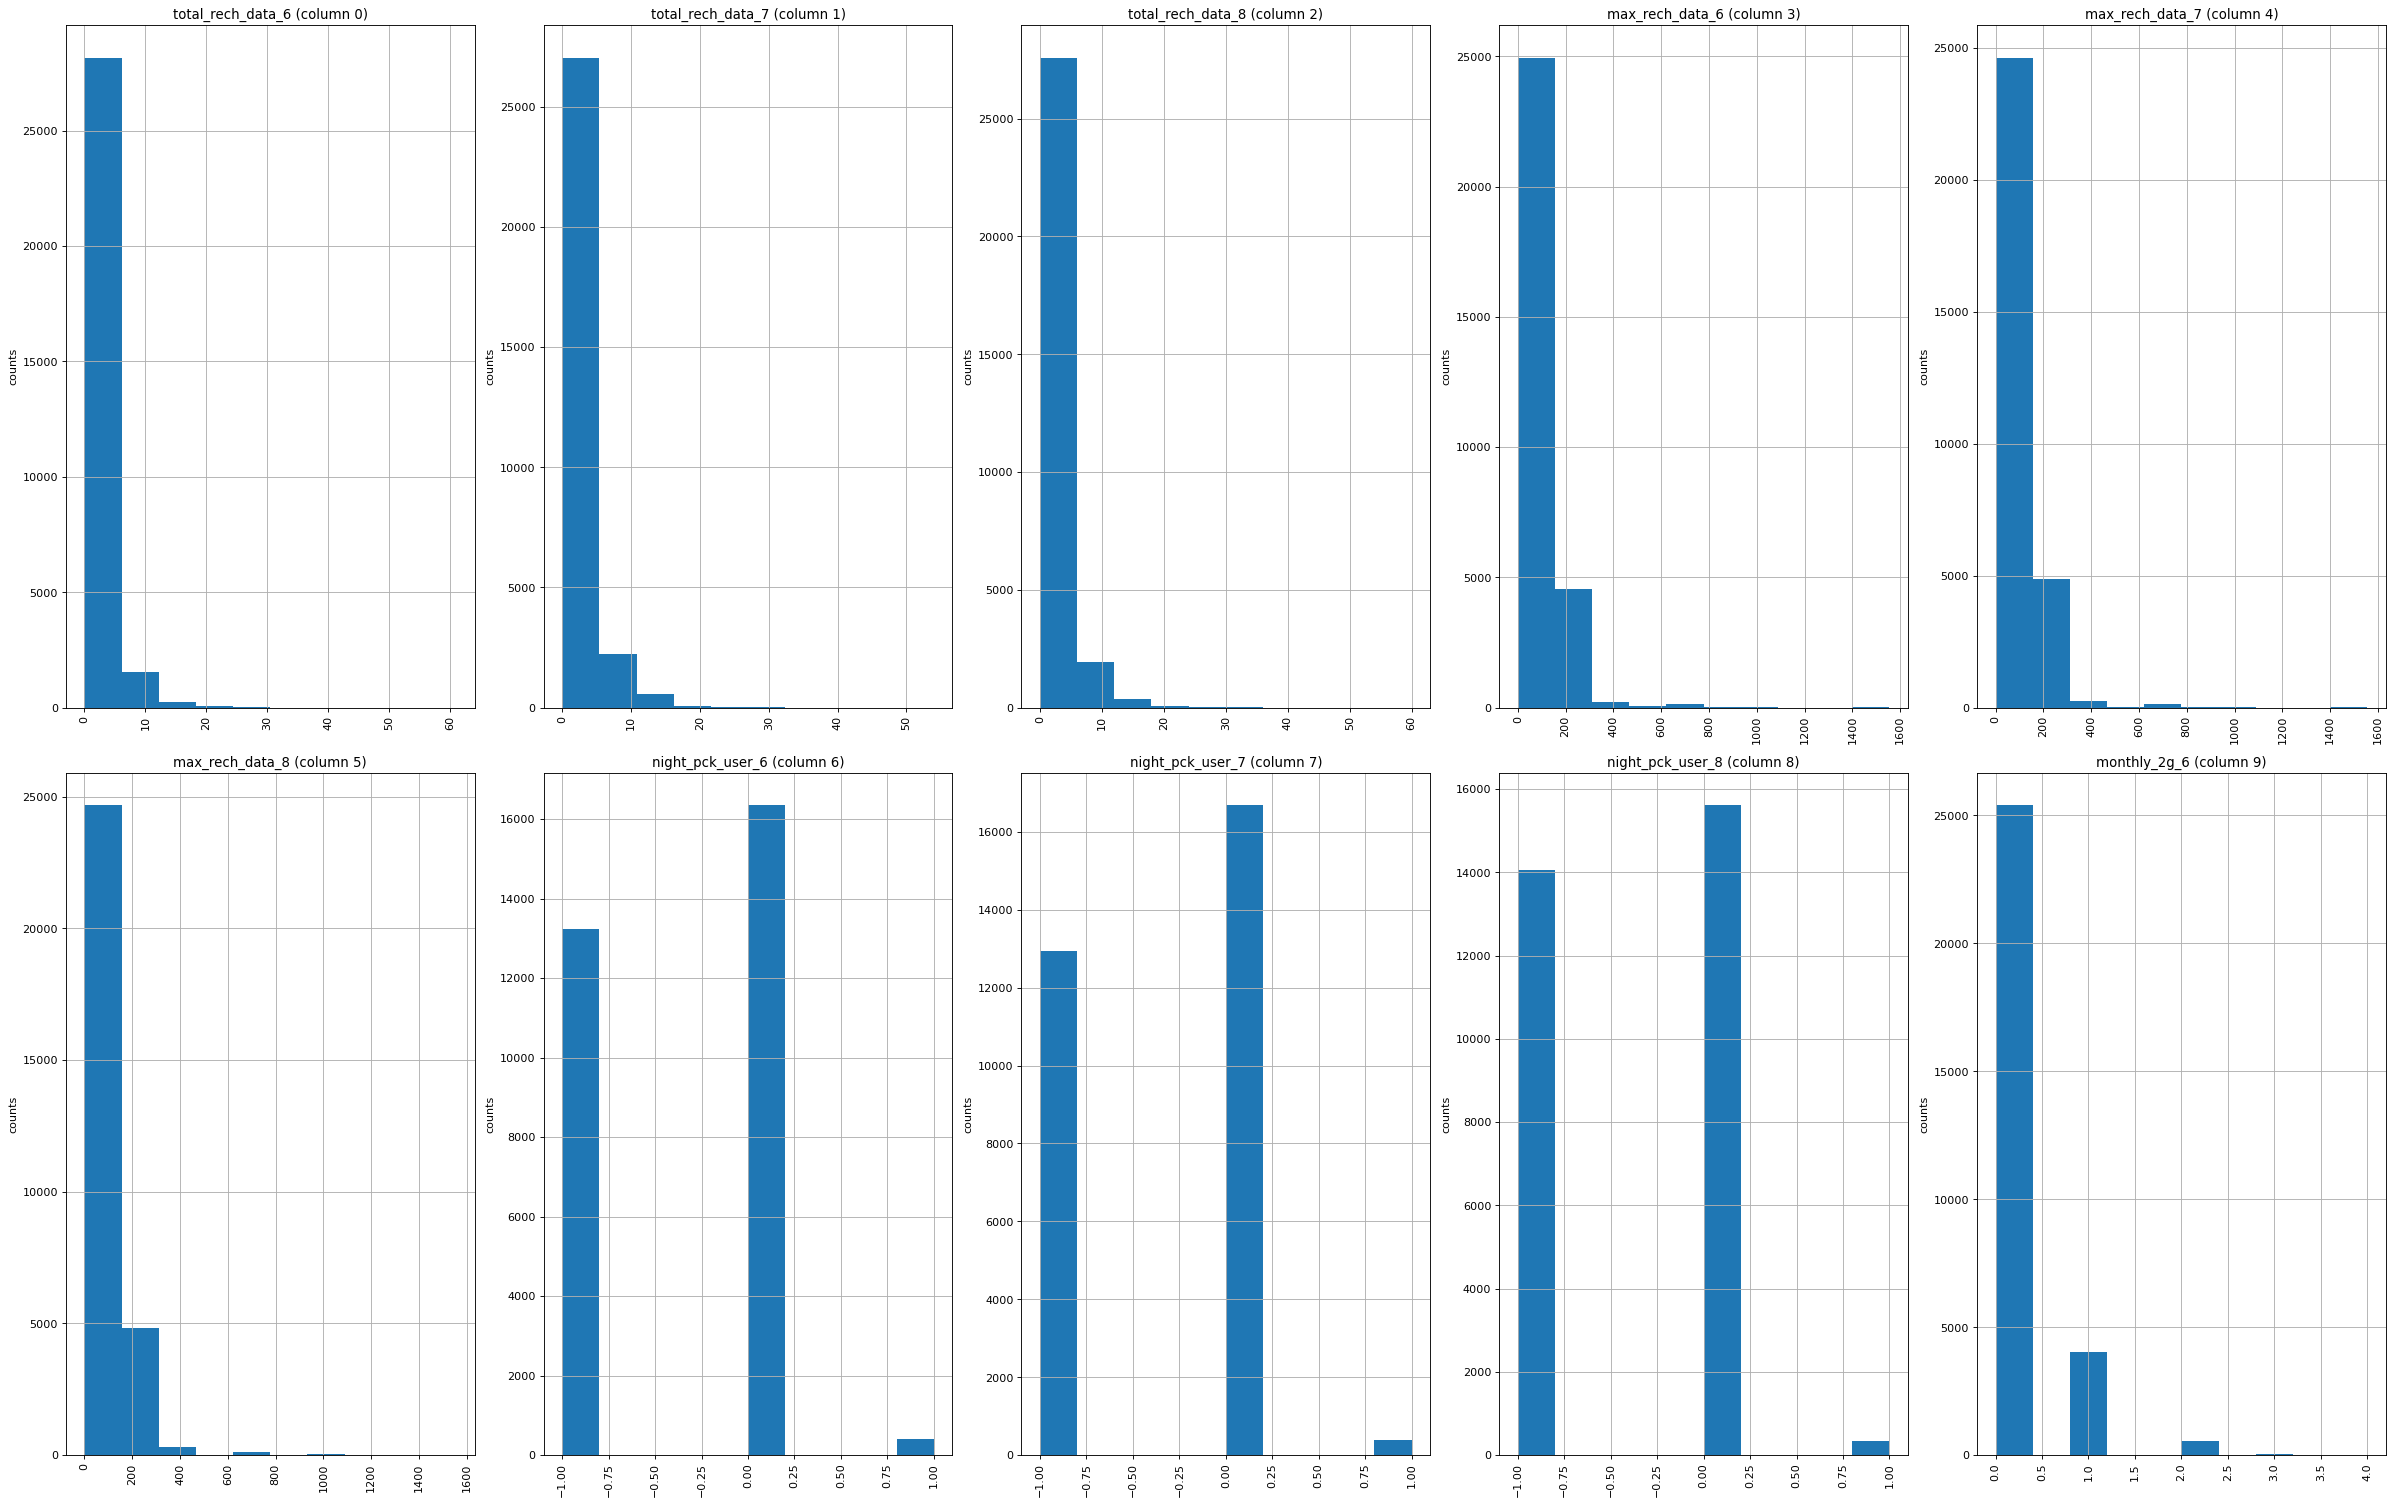

In [34]:
# lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    
# call the function to plot the graphs
plotPerColumnDistribution(telecom_df_filtered, 10, 5)

### observations : 
1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Volume based cost')

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

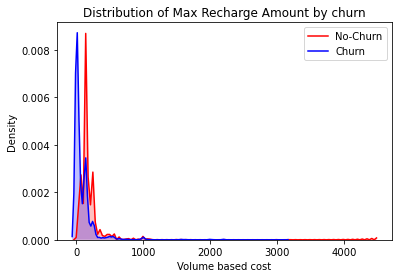

In [35]:
# churn vs max rechare amount
ax = sns.kdeplot(telecom_df_filtered.max_rech_amt_8[(telecom_df_filtered["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_df_filtered.max_rech_amt_8[(telecom_df_filtered["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

In [36]:
#sum of total isd MOU per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8'].sum()

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8
churn,,,
0,54878.384256,55788.338531,55749.827906
1,10705.220417,7803.375029,3651.080616


In [37]:
#mean of total 3G usage per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'].mean()

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,349.825292,383.548331,374.884935
1,281.407722,219.450729,87.399685


In [38]:
#mean of total 2G usage per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'].mean()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,127.830679,128.229264,113.243187
1,111.748697,89.736321,23.152745


In [39]:
pd.crosstab(telecom_df_filtered.churn, telecom_df_filtered.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,25.0,27.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
#sum of total special MOU per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8'].sum()

,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8
churn,,,
0,158573.998844,196975.149468,192047.383208
1,18112.657607,18957.121133,10592.875935


In [41]:
#mean of total incoming MOU per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.131789,306.840677,299.096525
1,231.451344,182.907534,63.444342


In [42]:
#mean of total outgoing MOU per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,593.763075,628.442026,581.998003
1,791.678435,627.508218,209.361368


In [43]:
#mean of total monthly recharge per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'].mean()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,649.574710,663.527830,613.701089
1,786.707087,626.290045,253.152806


In [44]:
#mean of maximum recharge amount per month churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8'].mean()

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.049456,173.336575,166.767199
1,171.942237,159.388775,85.370750


In [45]:
#mean of last recharge amount churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'].mean()

,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8
churn,,,
0,100.586938,102.275508,97.416800
1,104.356002,78.684146,35.680049


In [46]:
#mean of age on network churn vs Non-Churn
telecom_df_filtered.groupby(['churn'])['aon'].mean()

churn
0    1240.228120
1     860.952478
Name: aon, dtype: float64

In [47]:
pd.crosstab(telecom_df_filtered.churn, telecom_df_filtered.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


### Observations:
- incoming calls were reduced in action phase i.e. in august
- outgoing calls were reduced in action phase i.e. in august
- total recharge amount reduced in action phase i.e. in august
- Reuction is significant.
- Those who churned were customers who used services for less days as compared to customers who didn't churn.
- Overall most of the services that customer was using, reduced to low in action phase 8th month.

### Cap outliers in all numeric variables

In [48]:
# Cap outliers with k-sigma technique
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [49]:
# cap outliers in the numeric columns
telecom_df_filtered[num_cols] = telecom_df_filtered[num_cols].apply(cap_outliers, axis=0)

## Modelling

In [50]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Preprocessing data

In [51]:
# change churn to numeric
telecom_df_filtered['churn'] = pd.to_numeric(telecom_df_filtered['churn'])

### Test-Train split

In [52]:
# divide data into train and test
X = telecom_df_filtered.drop("churn", axis = 1)
y = telecom_df_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(22500, 172)

(22500,)

(7501, 172)

(7501,)

### Aggregating the categorical columns

In [53]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

night_pck_user_6
-1.0    0.099165
 0.0    0.066797
 1.0    0.087838
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.115746
 0.0    0.055494
 1.0    0.051282
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141108
 0.0    0.029023
 1.0    0.016194
Name: churn, dtype: float64

fb_user_6
-1.0    0.099165
 0.0    0.069460
 1.0    0.067124
Name: churn, dtype: float64

fb_user_7
-1.0    0.115746
 0.0    0.059305
 1.0    0.055082
Name: churn, dtype: float64

fb_user_8
-1.0    0.141108
 0.0    0.066887
 1.0    0.024463
Name: churn, dtype: float64

In [54]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [55]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cate_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


## PCA

In [56]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
telecom_churn_pca = pca.fit_transform(X_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [57]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.47
1       20.85
2       26.64
3       31.64
4       35.67
5       39.38
6       42.25
7       44.94
8       47.43
9       49.75
10      51.86
11      53.85
12      55.73
13      57.49
14      59.21
15      60.74
16      62.21
17      63.64
18      64.97
19      66.28
20      67.51
21      68.71
22      69.86
23      71.00
24      72.08
25      73.12
26      74.09
27      75.03
28      75.92
29      76.80
30      77.66
31      78.47
32      79.28
33      80.04
34      80.79
35      81.51
36      82.20
37      82.86
38      83.50
39      84.12
40      84.72
41      85.27
42      85.81
43      86.33
44      86.84
45      87.32
46      87.79
47      88.22
48      88.64
49      89.04
50      89.42
51      89.80
52      90.15
53      90.50
54      90.83
55      91.16
56      91.47
57      91.78
58      92.08
59      92.36
60      92.64
61      92.92
62      93.19
63      93.45
64      93.70
65      93.93
66      94.16
67      94.38
68      94.59
69      94.80
70      95.00
71    

<Figure size 630x360 with 0 Axes>

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

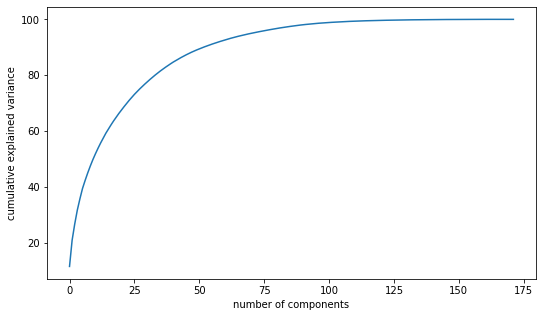

In [58]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(cumulative_variance)

#### Plot shows that 35 components are enough to explain close to 95% variance

In [59]:
#lets perform incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=35)
#fit
X_train_pca = pca_again.fit_transform(X_train)
X_train_pca.shape

(22500, 35)

In [60]:
#lets create correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
#correlations are close to 0

max corr: 0.00407634830246397 , min corr:  -0.005824542250251773


In [61]:
#Applying selected components to the test data - 35 components
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(7501, 35)

## PCA and Logistic Regression

In [62]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=60,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

0.8448444444444444

### Evaluate on test data

In [63]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5826 1065]
 [  91  519]]


In [64]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#lets print some scores
print ("Accuracy :",round(metrics.roc_auc_score(y_test, y_pred),2))
print ("Recall/Sensitivity :",round(metrics.recall_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5826 1065]
 [  91  519]]
Accuracy : 0.85
Recall/Sensitivity : 0.85
AUC:    	 0.92


### Hyperparameter tuning - PCA and Logistic Regression

In [65]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [66]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [67]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.123997,0.338548,0.085803,0.014540,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.904607,0.917437,0.901508,0.893396,0.896892,0.902769,0.008277,29
1,5.813601,0.363439,0.119398,0.031042,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.908085,0.918259,0.902172,0.895141,0.898384,0.904409,0.008155,16
2,5.582597,0.250894,0.088402,0.021231,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.905798,0.918199,0.899846,0.895842,0.896546,0.903247,0.008263,19
3,7.149400,0.969458,0.096803,0.029506,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.907822,0.919068,0.902338,0.896127,0.899477,0.904967,0.008027,7
4,4.312793,0.634376,0.093799,0.035769,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.904878,0.916476,0.902830,0.895097,0.896174,0.903091,0.007670,22
5,5.893199,0.457880,0.093802,0.017722,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.907346,0.919218,0.902669,0.896056,0.899756,0.905009,0.008007,4
6,5.546405,0.578733,0.094397,0.029363,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.903730,0.917312,0.901383,0.896205,0.895702,0.902867,0.007840,27
7,7.740797,0.883950,0.107401,0.034051,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.906700,0.919383,0.902734,0.896224,0.899603,0.904929,0.008013,9
8,4.109199,0.828491,0.097203,0.050284,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.905540,0.917115,0.900488,0.895319,0.896444,0.902982,0.007924,24
9,6.713799,0.687707,0.087403,0.012484,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",0.906498,0.919258,0.902766,0.896215,0.899653,0.904878,0.007952,12


In [68]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9050806299788798
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [69]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#lets print some scores
print ("Accuracy :",round(metrics.roc_auc_score(y_test, y_pred),2))
print ("Recall/Sensitivity :",round(metrics.recall_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6005  886]
 [ 111  499]]
Accuracy : 0.84
Recall/Sensitivity : 0.82
AUC:    	 0.92


### Random Forest

In [70]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [71]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8888523367932767
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [72]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#lets print some scores
print ("Accuracy :",round(metrics.roc_auc_score(y_test, y_pred),2))
print ("Recall/Sensitivity :",round(metrics.recall_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6802   89]
 [ 336  274]]
Accuracy : 0.72
Recall/Sensitivity : 0.45
AUC:    	 0.88


Poor sensitivity. The best model is PCA along with Logistic regression.

## Choosing best features

In [73]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [74]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   25.5s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=13,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

<Figure size 1080x720 with 0 Axes>

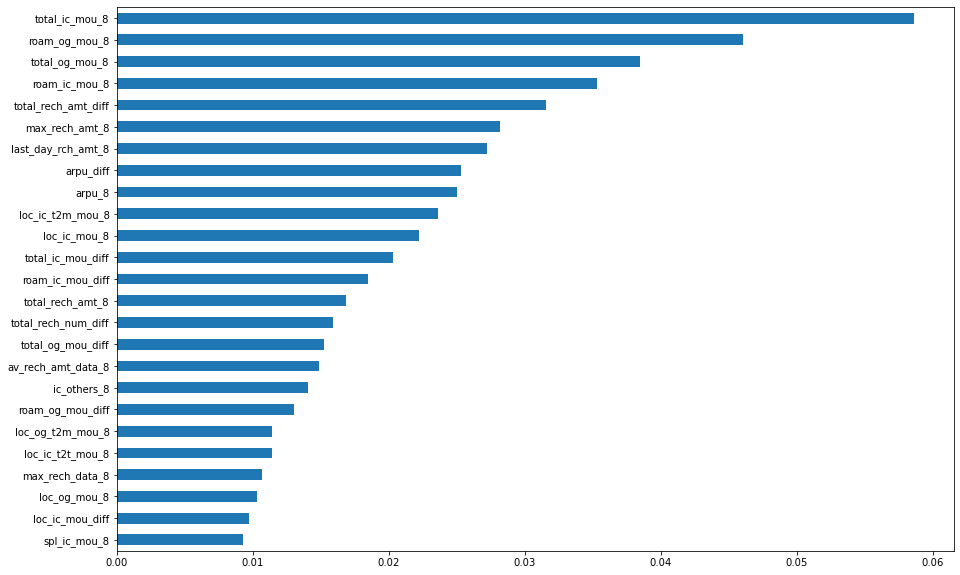

In [75]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(rf_model.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

- We could see from above plot that almost all the features of top 25 most important features are from action phase that is August month. Hence we need to focus on these features to identify high value customers who may churn in future.

In [76]:
# OOB score
rf_model.oob_score_

0.9456

In [77]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#lets print some scores
print ("Accuracy :",round(metrics.roc_auc_score(y_test, y_pred),2))
print ("Recall/Sensitivity :",round(metrics.recall_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6804   87]
 [ 326  284]]
Accuracy : 0.73
Recall/Sensitivity : 0.47
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Feature Importance

In [78]:
# predictors
features = telecom_df_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.859624
1,roam_og_mou_8,4.606446
2,total_og_mou_8,3.850318
3,roam_ic_mou_8,3.534012
4,total_rech_amt_diff,3.155009
5,max_rech_amt_8,2.817999
6,last_day_rch_amt_8,2.722006
7,arpu_diff,2.530351
8,arpu_8,2.499374
9,loc_ic_t2m_mou_8,2.362642


### Extracting top 30 features

In [79]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

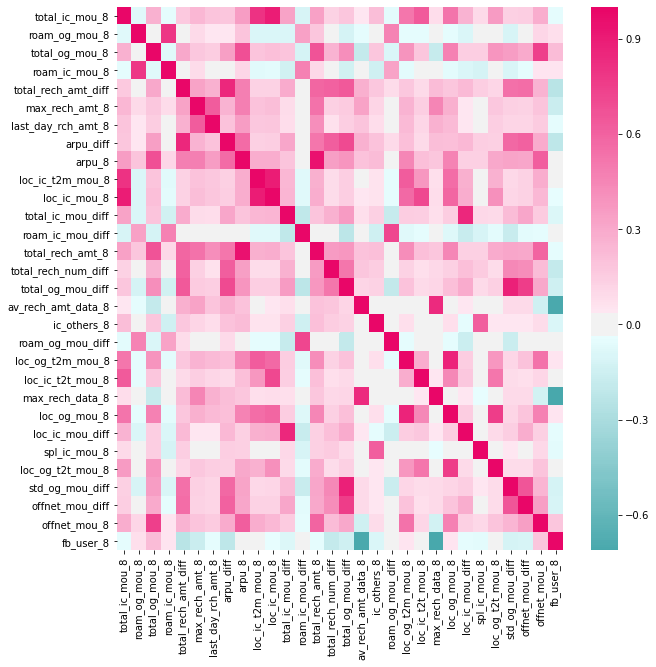

In [80]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [81]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [82]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [83]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [84]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8822038007144852
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l1'}


In [85]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#lets print some scores
print ("Accuracy :",round(metrics.roc_auc_score(y_test, y_pred),2))
print ("Recall/Sensitivity :",round(metrics.recall_score(y_test, y_pred),2))

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5795 1096]
 [ 121  489]]
Accuracy : 0.82
Recall/Sensitivity : 0.8
ROC:    	 0.89


### Extract the intercept and the coefficients from the logistic model

In [86]:
logistic_model = model.best_estimator_.named_steps['logistic']
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [87]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [88]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-1.57856,-0.859269,-0.690329,-2.268595,0.297906,0.17496,0.10948,0.119936,-0.786026,1.650609


## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 
* If customer is using the services for incoming calls only and has stopped using outgoing calls then he is finding the services very costly and may switch to network where incoming and outgoing services are in reasonable rate.
* Recharge amount is very important factor to notice if it starts reducing month by month then it need to be looked as cutomer may not be happy with the services he is getting that is why he started recharging with less amount.
* Number of Incoming and outgoing calls from a mobile number in particular month by customer. If number of calls starts reducing then it may be sign of customer trying to switch from one netwrok to another network or he is has already switched and using current netwrok for few days.